### Exercise-1: Calculating the average value of a CV

In [17]:
# Import some useful python libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os

In [18]:
os.chdir("/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2")
# set working directory for all future cells
!pwd
# or in python
os.getcwd()

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


'/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2'

In [12]:
pex0 = '''d1: READ FILE=data VALUE=d1 
          PRINT ARG=d1 FILE=colvar'''

In [15]:
!cd Exercises
!mkdir Exercises_0

In [16]:
# Output the input file above to the plumed.dat file
!cd Exercises_0
f = open("plumed.dat", "w")
f.write( pex0 )
f.close()

/bin/bash: line 0: cd: ../Exercises/Exercise_1: No such file or directory


In [21]:
%%bash
pwd
cd Exercises/Exercises_2
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=../../data/uncorrelated_data VALUES=rand
hhh: HISTOGRAM ARG=data STRIDE=1  GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 KERNEL=DISCRETE
fes: CONVERT_TO_FES GRID=hhh TEMP=1
DUMPGRID GRID=fes FILE=fes,dat
EOF
plumed driver --noatoms


/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natural units
PLUMED:   inside PLUMED, Boltzmann constant is 1
PLUMED: Action READ
PLUMED:   

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


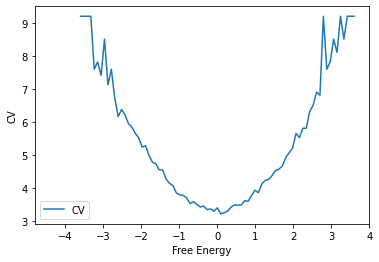

In [30]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercises_2/fes.dat")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["data"],data["fes"],label="CV")
# x-y axis labels
plt.xlabel("Free Energy")
plt.ylabel("CV")
plt.legend()

### Exercise-3

In [35]:
!mkdir Exercises/Exercise_3


mkdir: cannot create directory ‘Exercises/Exercise_3’: File exists


In [51]:
%%bash
pwd
cd Exercises/Exercise_3
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=../../data/uncorrelated_data VALUES=rand
# This line should calculate the square of the quantity read in from the file above
d2: CUSTOM ARG=data FUNC=x*x PERIODIC=NO 
# Calculate the average from the read-in data
av: AVERAGE ARG=data STRIDE=1 
# Calculate the average of the squares of the read in data
av2: AVERAGE ARG=d2 STRIDE=1  
# Evaluate the variance using the expression above
var: CUSTOM ARG=av,av2 FUNC=y-x*x PERIODIC=NO 
# Print the variance
PRINT ARG=var FILE=colvar 
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natural units
PLUMED:   inside PLUMED, Boltzmann constant is 1
PLUMED: Action READ
PLUMED:   

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


Text(0, 0.5, 'variance')

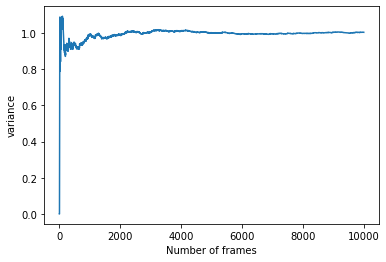

In [46]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercise_3/colvar")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["var"])
# x-y axis labels
plt.xlabel("Number of frames")
plt.ylabel("variance")

### Exercise-4

In [85]:
%%bash
pwd
mkdir Exercises/Exercise_4
cd Exercises/Exercise_4
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=../../data/uncorrelated_data VALUES=rand
av: AVERAGE ARG=data STRIDE=1 CLEAR=500
PRINT ARG=av FILE=colvar STRIDE=500
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natural units
PLUMED:   inside PLUMED, Boltzmann constant is 1
PLUMED: Action READ
PLUMED:   

mkdir: cannot create directory ‘Exercises/Exercise_4’: File exists


/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


Text(0, 0.5, 'Average value')

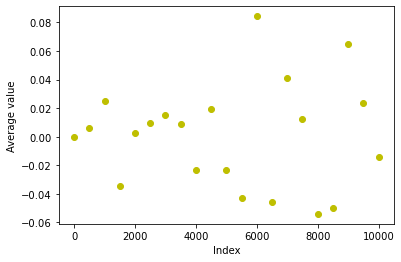

In [87]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercise_4/colvar")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["av"],'yo')
# x-y axis labels
plt.xlabel("Index")
plt.ylabel("Average value")

### Exercise-5

In [64]:
%%bash
pwd
cd Exercises/Exercise_5
pwd
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=../../data/uncorrelated_data VALUES=rand
hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 CLEAR=1000 KERNEL=DISCRETE
DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000 
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2/Exercises/Exercise_5
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natu

10


<ipython-input-68-a88d76e9cb9d>:19: RuntimeWarning: divide by zero encountered in log
  fes = -np.log( average )
<ipython-input-68-a88d76e9cb9d>:21: RuntimeWarning: invalid value encountered in true_divide
  ferr = error / average


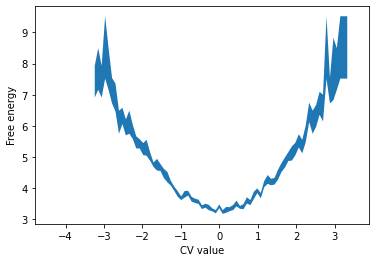

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import glob
 
hist1 = np.loadtxt("Exercises/Exercise_5/hist.dat")
N, average, average2 = 1, hist1[:,1], hist1[:,1]*hist1[:,1]
for filen in glob.glob( "Exercises/Exercise_5/analysis.*.hist.dat") : 
    histn = np.loadtxt(filen)
    N, average, average2 = N + 1, average + histn[:,1], average2 + histn[:,1]*histn[:,1]
print(N)    
# Final averages 
average = average / N
# Final variances
var = (N/(N-1))*( average2 / N - average*average ) 
# Errors
error = np.sqrt( var / N )
 
# Convert to free energy 
fes = -np.log( average )
# Convert to error in fes
ferr = error / average 
 
# And draw graph of free energy surface
plt.fill_between( hist1[:,0], fes-ferr, fes+ferr )
plt.xlabel("CV value")
plt.ylabel('Free energy')
plt.show()

### Exercise-6

In [70]:
import numpy as np
 
ddd = np.loadtxt("data/uncorrelated_data")
data = ddd[0:500,1]
 
bootstraps = np.zeros(200)
for i in range(200) : 
    av = 0
    for j in range(500) : av = av + data[np.random.randint(0,500)]
    bootstraps[i] = av / 500 
 
f = open("bootstraps", "w")
f.write("#! FIELDS time boot \n")
for i in range(0,200):
    f.write(str(i) + " "  + str(bootstraps[i]) + "\n" )
f.close()

In [73]:
%%bash
pwd
cd Exercises/Exercise_6
pwd
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=bootstraps VALUES=boot
# This line should calculate the square of the quantity read in from the file above
d2: CUSTOM ARG=data FUNC=x*x PERIODIC=NO 
# Calculate the average from the read-in data
av: AVERAGE ARG=data STRIDE=1 
# Calculate the average of the squares of the read in data
av2: AVERAGE ARG=d2 STRIDE=1 
# Evaluate the variance using the expression above
var: CUSTOM ARG=av,av2 FUNC=y-x*x PERIODIC=NO 
# Print the variance
PRINT ARG=var FILE=colvar 
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2/Exercises/Exercise_6
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natu

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


Text(0, 0.5, 'variance')

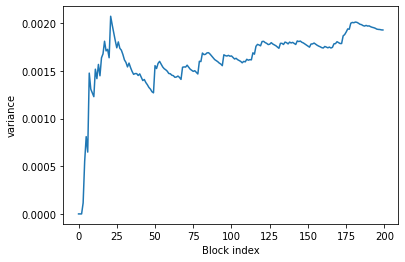

In [75]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercise_6/colvar")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["var"])
# x-y axis labels
plt.xlabel("Block index")
plt.ylabel("variance")

### Exercise-7

In [76]:
%%bash
pwd
mkdir Exercises/Exercise_7
cd Exercises/Exercise_7
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=../../data/correlated_data VALUES=rand
av: AVERAGE ARG=data STRIDE=1 CLEAR=500
PRINT ARG=data,av FILE=colvar 
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natural units
PLUMED:   inside PLUMED, Boltzmann constant is 1
PLUMED: Action READ
PLUMED:   

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


Text(0, 0.5, 'Average value')

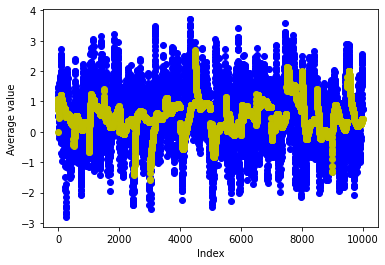

In [77]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercise_7/colvar")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["data"], 'bo', data["av"],'yo')
# x-y axis labels
plt.xlabel("Index")
plt.ylabel("Average value")

In [78]:
import numpy as np
 
ddd = np.loadtxt("data/correlated_data")
data = ddd[0:500,1]
 
bootstraps = np.zeros(200)
for i in range(200) : 
    av = 0
    for j in range(500) : av = av + data[np.random.randint(0,500)]
    bootstraps[i] = av / 500 
 
f = open("Exercises/Exercise_7/bootstraps", "w")
f.write("#! FIELDS time boot \n")
for i in range(0,200):
    f.write(str(i) + " "  + str(bootstraps[i]) + "\n" )
f.close()

In [79]:
%%bash
pwd
cd Exercises/Exercise_7
pwd
cat > plumed.dat << EOF
UNITS NATURAL
data: READ FILE=bootstraps VALUES=boot
# This line should calculate the square of the quantity read in from the file above
d2: CUSTOM ARG=data FUNC=x*x PERIODIC=NO 
# Calculate the average from the read-in data
av: AVERAGE ARG=data STRIDE=1 
# Calculate the average of the squares of the read in data
av2: AVERAGE ARG=d2 STRIDE=1 
# Evaluate the variance using the expression above
var: CUSTOM ARG=av,av2 FUNC=y-x*x PERIODIC=NO 
# Print the variance
PRINT ARG=var FILE=colvar 
EOF
plumed driver --noatoms

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2
/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2/Exercises/Exercise_7
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:21:21
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/sbkashif-wsl2/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 0
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action UNITS
PLUMED:   with label @0
PLUMED:   length: nm
PLUMED:   energy: kj/mol
PLUMED:   time: ps
PLUMED:   charge: e
PLUMED:   mass: amu
PLUMED:   using natu

/mnt/c/Users/Salman Bin Kashif/Dropbox/codes/plumed-materclass-21-2


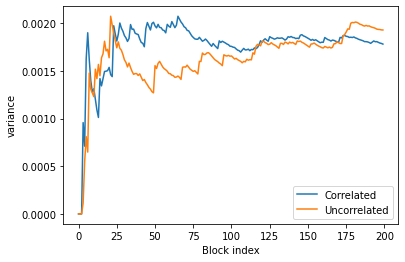

In [82]:
!pwd
import plumed
data=plumed.read_as_pandas("Exercises/Exercise_7/colvar")
data1=plumed.read_as_pandas("Exercises/Exercise_6/colvar")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["var"], label="Correlated")
plt.plot(data1["time"],data1["var"], label="Uncorrelated")
# x-y axis labels
plt.xlabel("Block index")
plt.ylabel("variance")
plt.legend()

### Exercise-8

In [ ]:

%%bash
pwd
cd Exercises/Exercise_7
pwd
cat > plumed.dat << EOFUNITS NATURAL # This ensures that Boltzmann's constant is one 
data: READ FILE=weighted_data VALUES=rand 
# This restraint and the REWEIGHT_BIAS command after computes the weights in the formulas above.
mm: RESTRAINT ARG=data AT=0.6 KAPPA=4 
rw: REWEIGHT_BIAS TEMP=1 
wav: AVERAGE ARG=data STRIDE=1 LOGWEIGHTS=rw 
# These lines compute the variance of the random variable
dd: CUSTOM ARG=data,wav FUNC=(x-y)*(x-y) PERIODIC=NO 
uvar: AVERAGE ARG=dd STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false 
one: CONSTANT VALUE=1 
wsum: AVERAGE ARG=one STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false 
var: CUSTOM ARG=wav,var FUNC=x/(y-1) PERIODIC=NO 
# Print out the average and variance of the uniform random variable
PRINT ARG=wsum,var STRIDE=1 FILE=colvar 
# Construct the histogram
hhh: HISTOGRAM ARG=data LOGWEIGHTS=rw GRID_MIN=0 GRID_MAX=1 GRID_MIN=20 CLEAR=1000 NORMALIZATION=true KERNEL=DISCRETE 
DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000 
EOF
plumed driver --noatoms